# Importación de librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Importación del dataset

In [13]:
df0 = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv",sep=";")
df0.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA

## Información de los datos

In [4]:
df0.shape

(41188, 21)

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
df0 = df0.drop_duplicates()
df0.shape

(41176, 21)

### Eliminar información irrelevante

In [17]:
# Analizando la información el único que valdría la pena no tomar en cuenta es contact
df = df0.drop("contact", axis = 1)
df.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Análisis de variables univariantes

### Variables Categóricas

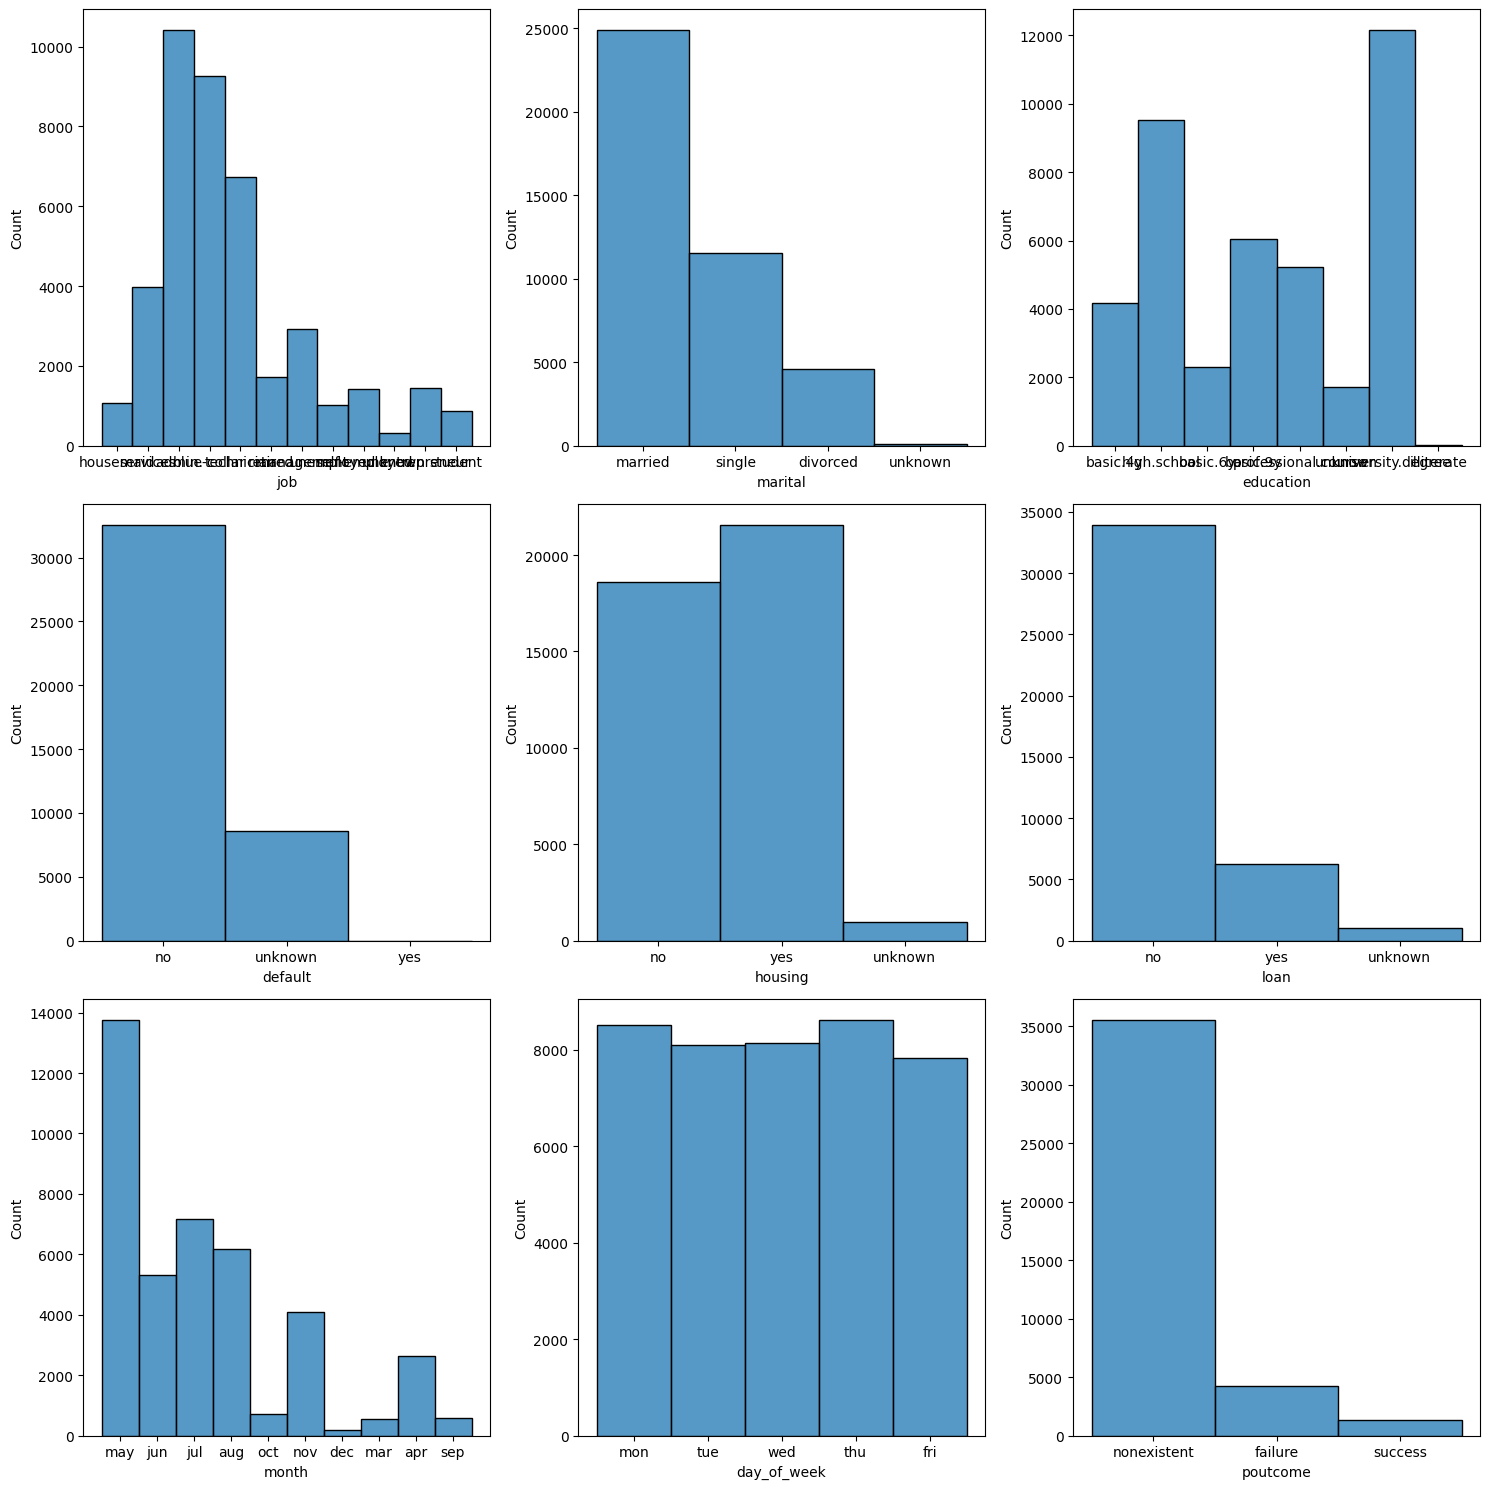

In [13]:
fig, axis = plt.subplots(3, 3, figsize=(15, 15))


sns.histplot(ax=axis[0, 0], data=df, x='job')
sns.histplot(ax=axis[0, 1], data=df, x='marital')
sns.histplot(ax=axis[0, 2], data=df, x='education')

sns.histplot(ax=axis[1, 0], data=df, x='default')
sns.histplot(ax=axis[1, 1], data=df, x='housing')
sns.histplot(ax=axis[1, 2], data=df, x='loan')

sns.histplot(ax=axis[2, 0], data=df, x='month')
sns.histplot(ax=axis[2, 1], data=df, x='day_of_week')
sns.histplot(ax=axis[2, 2], data=df, x='poutcome')


plt.tight_layout()
plt.show()


In [18]:
# del análisis de la variables categóricas, se puede concluir que por lo pronto todas las variables se mantienen.
# para las variables númericas, vale la pena renombar las siguientes:
df =df.rename(columns={'emp.var.rate':'variacion_empleo', 'cons.price.idx': 'ipc', 'cons.conf.idx': 'confianza_consumidor'})
df.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,variacion_empleo,ipc,confianza_consumidor,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Variables Numéricas

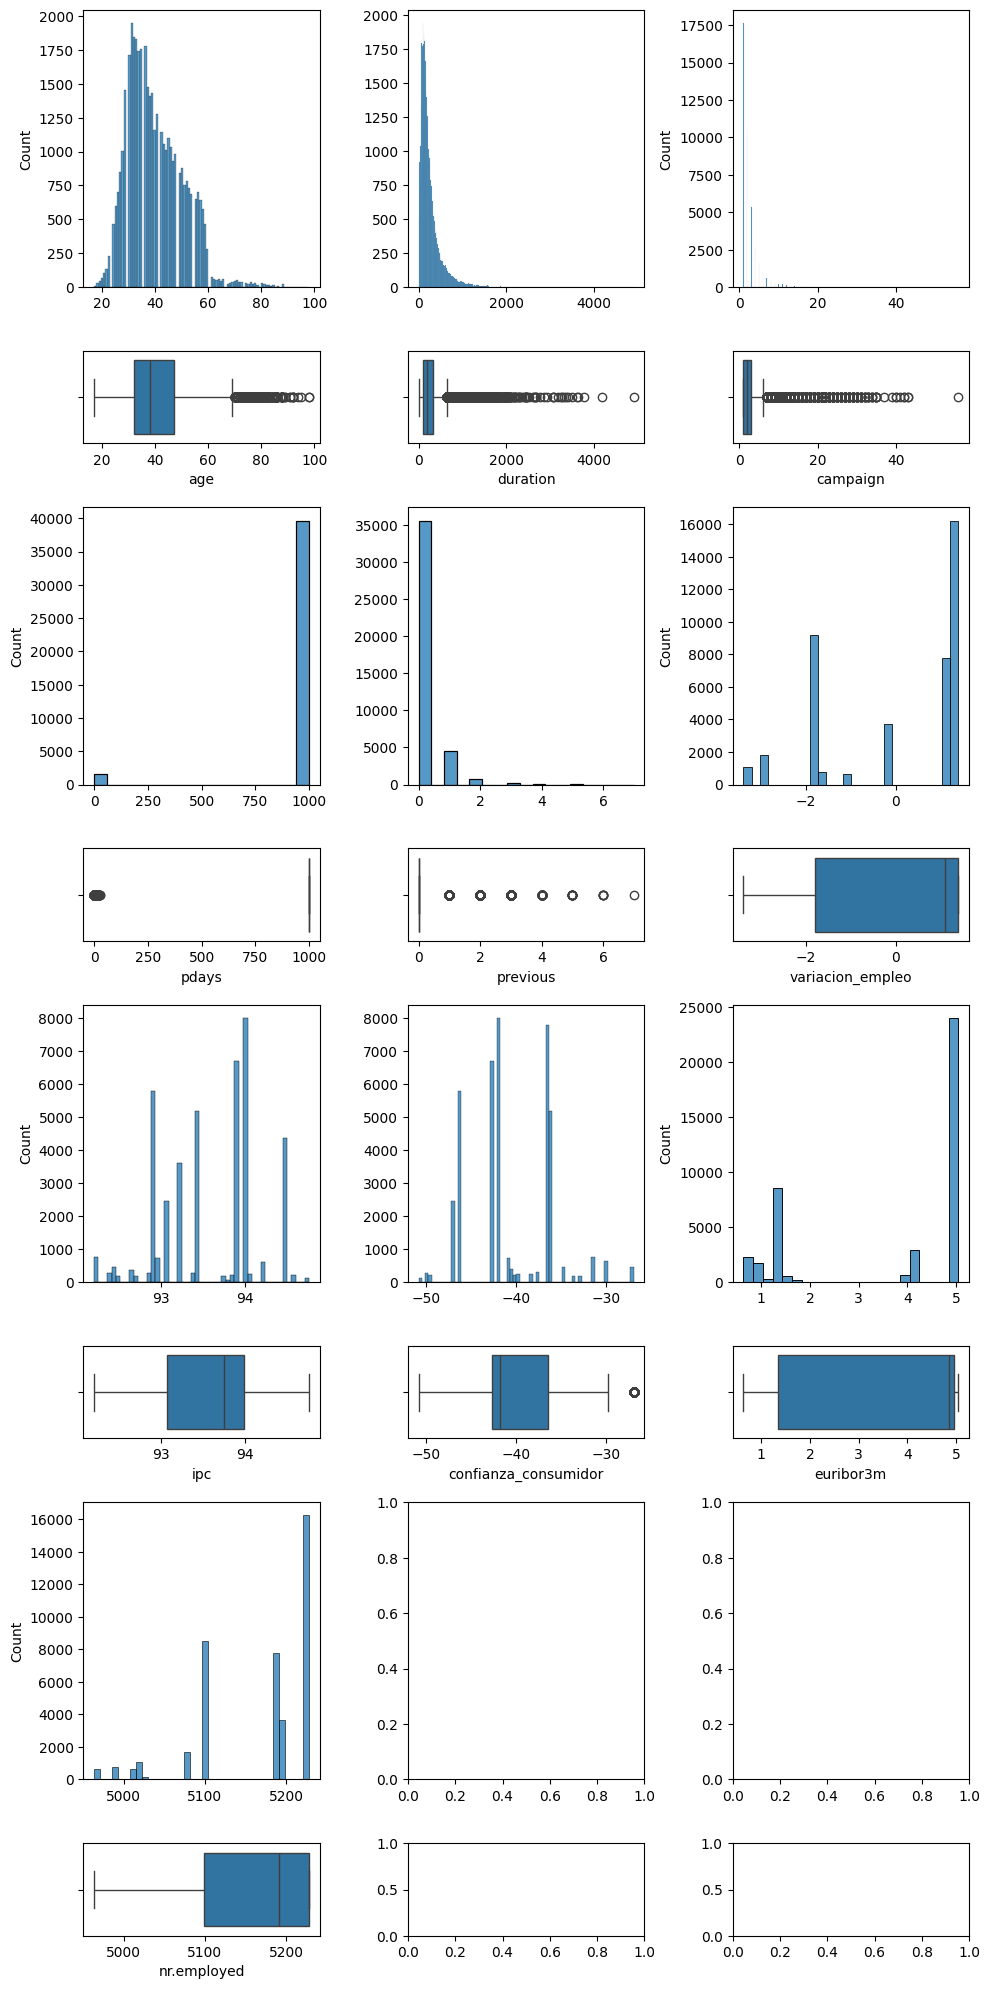

In [23]:
fig, axis = plt.subplots(8, 3, figsize = (10, 20), gridspec_kw={'height_ratios': [6, 2, 6, 2, 6, 2, 6, 2]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "duration").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "duration")
sns.histplot(ax = axis[0, 2], data = df, x = "campaign").set(xlabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "campaign")

sns.histplot(ax = axis[2, 0], data = df, x = "pdays").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "pdays")
sns.histplot(ax = axis[2, 1], data = df, x = "previous").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "previous")
sns.histplot(ax = axis[2, 2], data = df, x = "variacion_empleo").set(xlabel = None)
sns.boxplot(ax = axis[3, 2], data = df, x = "variacion_empleo")


sns.histplot(ax = axis[4, 0], data = df, x = "ipc").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = df, x = "ipc")
sns.histplot(ax = axis[4, 1], data = df, x = "confianza_consumidor").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = df, x = "confianza_consumidor")
sns.histplot(ax = axis[4, 2], data = df, x = "euribor3m").set(xlabel = None)
sns.boxplot(ax = axis[5, 2], data = df, x = "euribor3m")

sns.histplot(ax = axis[6, 0], data = df, x = "nr.employed").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = df, x = "nr.employed")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## Guardar Dataframe

In [19]:

df.to_csv('df.csv',index=False)

## Análisis de variables multivariante

In [20]:
# traemos primeramente el dataframe para trabajar
import pandas as pd
Log =  pd.read_csv('/workspaces/logistic_regression/src/df.csv')
Log.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,variacion_empleo,ipc,confianza_consumidor,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Análisis de correlaciones

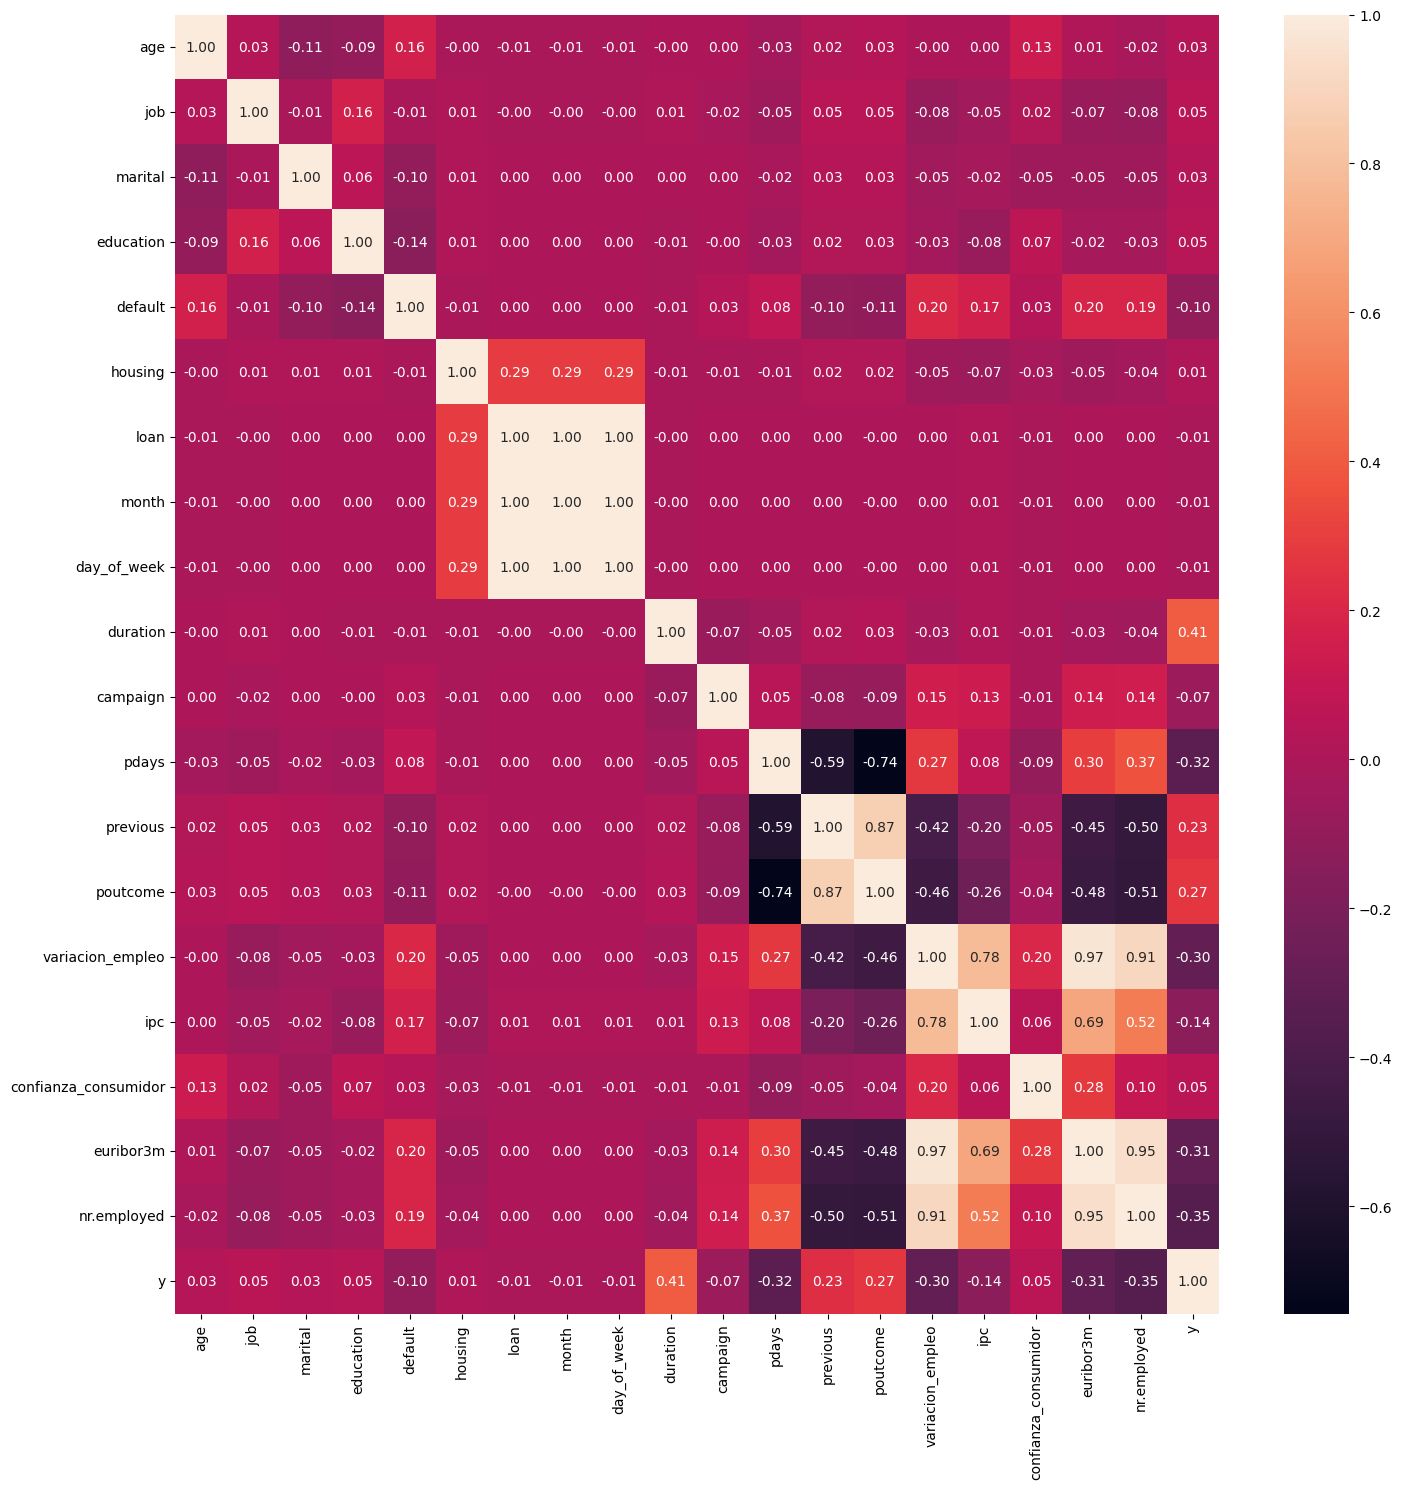

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
#antes de graficar, toca factorizar las variables categóricas:
Log["job"] = pd.factorize(Log["job"])[0]
Log["marital"] = pd.factorize(Log["marital"])[0]
Log["education"] = pd.factorize(Log["education"])[0]
Log["default"] = pd.factorize(Log["default"])[0]
Log["housing"] = pd.factorize(Log["housing"])[0]
Log["loan"] = pd.factorize(Log["loan"])[0]
Log["month"] = pd.factorize(Log["loan"])[0]
Log["day_of_week"] = pd.factorize(Log["loan"])[0]
Log["poutcome"] = pd.factorize(Log["poutcome"])[0]
Log["y"] = pd.factorize(Log["y"])[0]

fig, axis = plt.subplots(figsize = (15, 15))
sns.heatmap(Log[["age", "job", "marital", "education", "default", "housing", "loan", "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome", "variacion_empleo", "ipc", "confianza_consumidor", "euribor3m", "nr.employed", "y"]].corr(), annot = True, fmt = ".2f")
plt.tight_layout() 
plt.show()

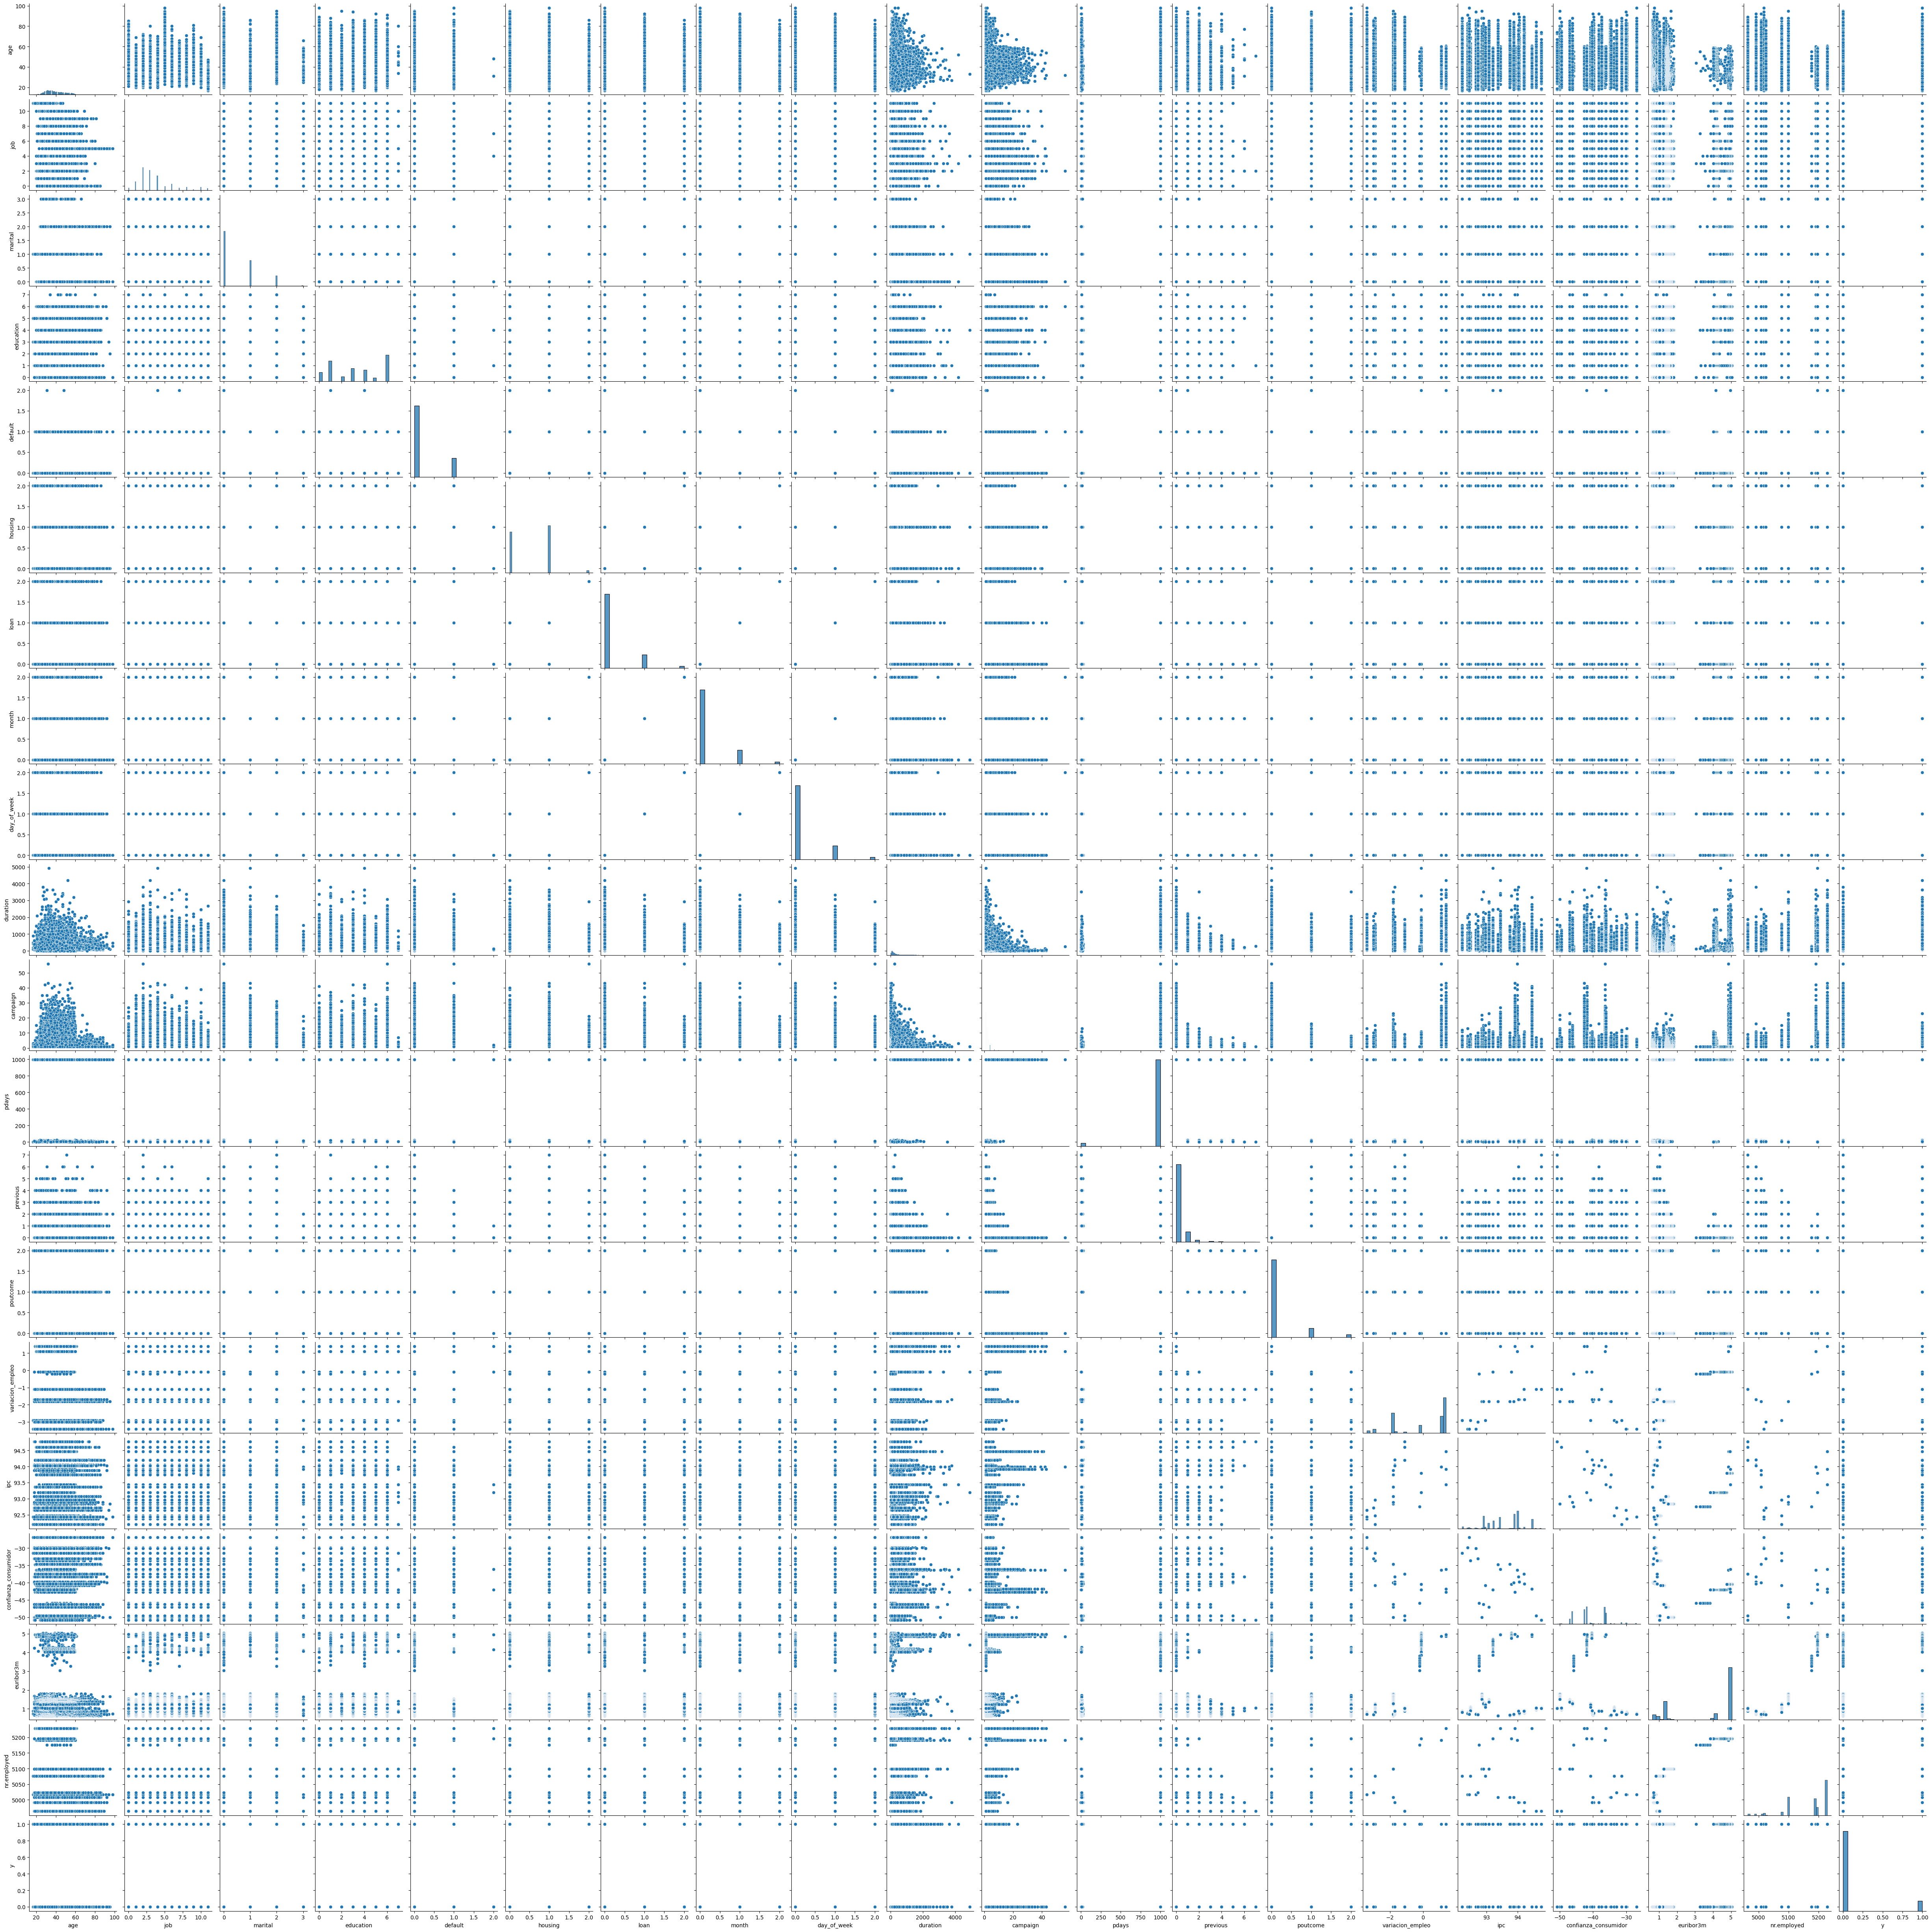

In [23]:
sns.pairplot(data = Log)

## Ingeniería de Características

### Escalado de valores

In [24]:
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de datos en muestras de train y test
X = Log.drop("y", axis = 1)
y = Log["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,variacion_empleo,ipc,confianza_consumidor,euribor3m,nr.employed
12556,40,3,0,3,1,1,0,0,0,94,2,999,0,0,1.4,93.918,-42.7,4.960,5228.1
35451,31,2,0,6,0,0,0,0,0,116,4,999,0,0,-1.8,92.893,-46.2,1.244,5099.1
30592,59,5,0,0,0,0,0,0,0,13,6,999,1,1,-1.8,92.893,-46.2,1.354,5099.1
17914,43,0,2,3,0,1,0,0,0,94,5,999,0,0,1.4,93.918,-42.7,4.961,5228.1
3315,39,2,1,1,1,0,0,0,0,344,2,999,0,0,1.1,93.994,-36.4,4.860,5191.0


### Selección de Características

In [25]:
from sklearn.feature_selection import f_classif, SelectKBest

# Son demasiadas variables, por tanto, se debe acotar con las variables más relevantes: k = 5
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

### Guardado de los datos de entrenamiento y prueba

In [26]:
X_train_sel["y"] = list(y_train)
X_train_sel.to_csv("Train.csv", index=False)
X_test_sel["y"] = list(y_test)
X_test_sel.to_csv("Test.csv", index=False)

# Entrenamiento del modelo

In [28]:
import pandas as pd

train =  pd.read_csv('/workspaces/logistic_regression/src/Train.csv')
test = pd.read_csv('/workspaces/logistic_regression/src/Test.csv')

train.head()

,duration,pdays,variacion_empleo,euribor3m,nr.employed,y
0,94.0,999.0,1.4,4.960,5228.1,0
1,116.0,999.0,-1.8,1.244,5099.1,0
2,13.0,999.0,-1.8,1.354,5099.1,0
3,94.0,999.0,1.4,4.961,5228.1,0
4,344.0,999.0,1.1,4.860,5191.0,0


In [29]:
X_train = train.drop("y", axis = 1)
y_train = train["y"]
y_train = pd.to_numeric(y_train)

X_test = test.drop("y", axis = 1)
y_test = test["y"]
y_test = pd.to_numeric(y_test)

X_train.head()

,duration,pdays,variacion_empleo,euribor3m,nr.employed
0,94.0,999.0,1.4,4.960,5228.1
1,116.0,999.0,-1.8,1.244,5099.1
2,13.0,999.0,-1.8,1.354,5099.1
3,94.0,999.0,1.4,4.961,5228.1
4,344.0,999.0,1.1,4.860,5191.0


## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear una instancia del modelo de regresión logística
model_log = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model_log.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred_log = model_log.predict(X_test)

#y_pred_log.head()

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Precisión del modelo

In [34]:
# Calcular la exactitud del modelo de regresión logística
accuracy_log = accuracy_score(y_test, y_pred_log)
print (round(accuracy_log, 4))

0.9098


### Hiperparametrización (GridSearch)

In [35]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model_log, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [37]:
# Ver el mejor conjunto de parámetros
grid.fit(X_train, y_train)
grid.best_params_

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:3

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [38]:
model_Log_GS= LogisticRegression(**grid.best_params_)
model_Log_GS.fit(X_train, y_train)

LogisticRegression(C=10, solver='newton-cg')

In [41]:
y_pred_log_GS = model_Log_GS.predict(X_train)

In [43]:
# Calcular la exactitud del modelo de regresión logística optimizado
accuracy_log = accuracy_score(y_train, y_pred_log_GS)
print (round(accuracy_log, 4))

0.908


# Guardado del modelo

In [45]:
from pickle import dump

dump(model_Log_GS, open("../models/logistic_regression_GS.sav", "wb"))